In [1]:
# to install
!pip install vtreat
# https://github.com/WinVector/pyvtreat/

In [2]:
!pip install wvpy
# https://github.com/WinVector/wvpy/

Load modules/packages.

In [3]:
import pygam
import pandas
import numpy
import numpy.random
import seaborn
import matplotlib.pyplot 
import vtreat
import vtreat.util
import wvpy.util

Generate example data.

In [4]:
d = pandas.DataFrame({'x':[0.1*i for i in range(500)]})
d['y'] = numpy.sin(d['x']) + 0.1*numpy.random.normal(size=d.shape[0])
d['xc'] = ['level_' + str(5*numpy.round(yi/5, 1)) for yi in d['y']]
d.loc[d['xc']=='level_-1.0', 'xc'] = numpy.nan
d['yc'] = d['y']>0.5
d.head()

,x,y,xc,yc
0,0.0,0.134061,level_0.0,False
1,0.1,-0.077464,level_-0.0,False
2,0.2,0.311772,level_0.5,False
3,0.3,0.327691,level_0.5,False
4,0.4,0.315390,level_0.5,False


In [5]:
numpy.mean(d['yc'])

0.32

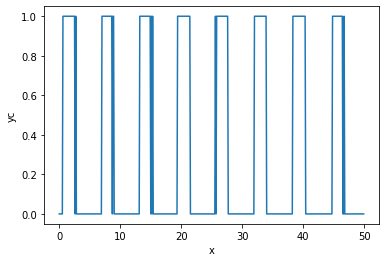

In [6]:
seaborn.lineplot(x='x', y='yc', data=d)

Build a classification model.

In [7]:
transform = vtreat.BinomialOutcomeTreatment(
    outcome_name='yc', 
    outcome_target=True,
    cols_to_copy=['y'])

In [8]:
d_prepared = transform.fit_transform(d, d['yc'])
d_prepared.head()

,y,yc,xc_is_bad,x,xc_logit_code,xc_prevalence_code,xc_lev_level_1.0,xc_lev__NA_,xc_lev_level_-0.5,xc_lev_level_0.5
0,0.134061,False,0.0,0.0,-5.690079,0.086,0,0,0,0
1,-0.077464,False,0.0,0.1,-5.699682,0.080,0,0,0,0
2,0.311772,False,0.0,0.2,0.429606,0.176,0,0,0,1
3,0.327691,False,0.0,0.3,0.349373,0.176,0,0,0,1
4,0.315390,False,0.0,0.4,0.284837,0.176,0,0,0,1


In [9]:
transform.score_frame_

,variable,orig_variable,treatment,y_aware,has_range,PearsonR,significance,vcount,recommended
0,xc_is_bad,xc,missing_indicator,False,True,-0.364321,3.859631e-17,1.0,True
1,x,x,clean_copy,False,True,-0.076400,8.790132e-02,1.0,True
2,xc_logit_code,xc,logit_code,True,True,0.836209,5.074485e-132,1.0,True
3,xc_prevalence_code,xc,prevalence_code,False,True,0.468855,1.083424e-28,1.0,True
4,xc_lev_level_1.0,xc,indicator_code,False,True,0.819178,2.533856e-122,4.0,True
5,xc_lev__NA_,xc,indicator_code,False,True,-0.364321,3.859631e-17,4.0,True
6,xc_lev_level_-0.5,xc,indicator_code,False,True,-0.334399,1.579735e-14,4.0,True
7,xc_lev_level_0.5,xc,indicator_code,False,True,0.129124,3.825648e-03,4.0,True


Look at `xc_logit_code`.

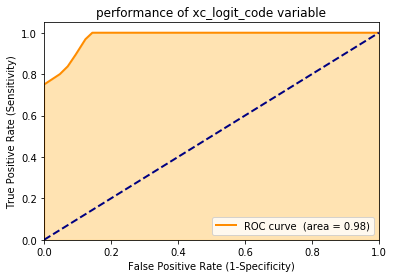

0.9796415441176471

In [10]:
wvpy.util.plot_roc(prediction=d_prepared['xc_logit_code'], 
                   istrue=d_prepared['yc'],
                   title = 'performance of xc_logit_code variable')

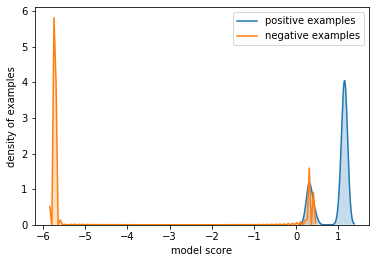

In [11]:
wvpy.util.dual_density_plot(probs=d_prepared['xc_logit_code'], 
                            istrue=d_prepared['yc'])

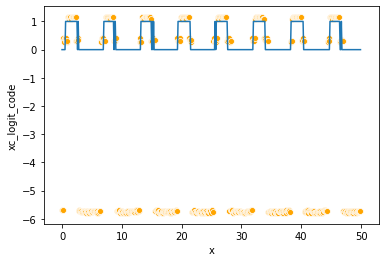

In [12]:
seaborn.lineplot(x='x', y='yc', data=d_prepared)
seaborn.scatterplot(x='x', y='xc_logit_code', data=d_prepared, 
                    color='orange')

Look at `xc_prevalence_code`.

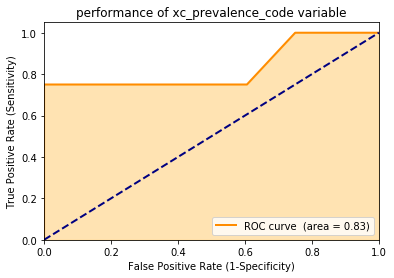

0.830514705882353

In [13]:
wvpy.util.plot_roc(prediction=d_prepared['xc_prevalence_code'], 
                   istrue=d_prepared['yc'],
                   title = 'performance of xc_prevalence_code variable')

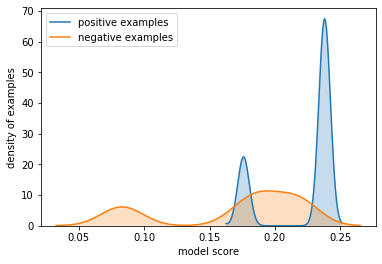

In [14]:
wvpy.util.dual_density_plot(probs=d_prepared['xc_prevalence_code'], 
                            istrue=d_prepared['yc'])

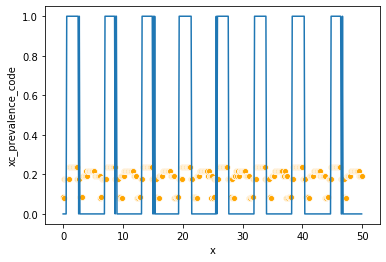

In [15]:
seaborn.lineplot(x='x', y='yc', data=d_prepared)
seaborn.scatterplot(x='x', y='xc_prevalence_code', data=d_prepared, 
                    color='orange')